# 2. Actividad solar: latitud de las manchas solares (butterfly diagram)

This notebook is part of the work done under the project Astronomía Accesible (http://astroaccesible.iaa.es/)<br>

This notebook continues the work performed in the first notebook. It uses data from the Royal Observatory, Greenwich - USAF/NOAA Sunspot Data (https://solarscience.msfc.nasa.gov/greenwch.shtml), to study the appearance of sunspots as a function of latitude and time. A butterfly diagram is expected to describe this behaviour. We will see this explicitly. All plots will be sonified.

In [1]:
from astronify.series import SoniSeries
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
from astropy.table import Table
from urllib.request import urlopen

import os
os.chdir('../')
folder = os.getcwd() 

from matplotlib import rcParams
rcParams['font.size']=22
rcParams['axes.linewidth']=2
rcParams['xtick.major.width']=2
rcParams['xtick.minor.width']=2
rcParams['ytick.major.width']=2
rcParams['ytick.minor.width']=2


WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



In [2]:
# data from https://solarscience.msfc.nasa.gov/greenwch/bflydata.txt
file = urlopen('https://solarscience.msfc.nasa.gov/greenwch/bflydata.txt')

# store time values
time = []
# store sunspot number @latitude
suns_data = []

# time counter
k = 0

for line in file:
    l = line.decode('utf-8') # convert the data in the file to a string
    if k%6 == 0: # 5 lines for sunspots at different latitudes for each time bin
        time.append(float(l.rstrip('\n')))
    else:
        suns_data.append(l.rstrip('\n')) # aprovechar we're reading the file to store the data
    k += 1

time = numpy.asarray(time) # convert to proper array
suns_lat = numpy.empty((50,len(time))) + numpy.nan # use number of time bins to create future suns matrix

In [3]:
# suns_data gather in groups of 5
counter = 0 # from 0 to 4 (5 arrays), 10 values each
time_counter = 0
for line in suns_data:
    # last of suns_data appears as '' [empty]
    # each line contains 10 latitude bins 
    suns_lat[10*counter:(10*counter+10),time_counter] = numpy.asarray(line.rsplit(',')[:-1], dtype=float)
    counter +=1
    if counter==5: # 5 lines in total
        counter=0
        time_counter +=1

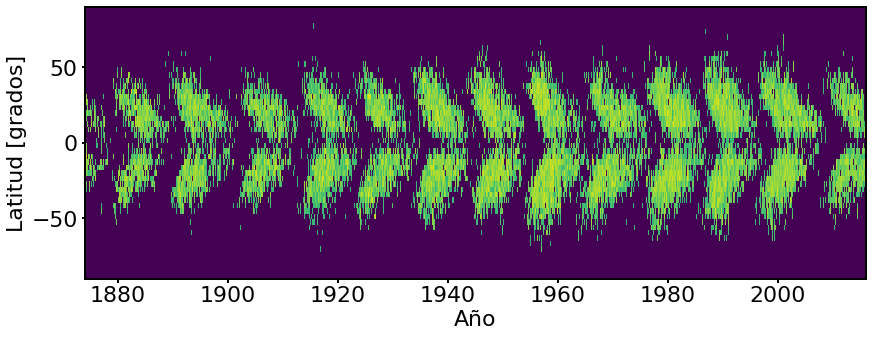

In [4]:
rcParams['font.size']=22
fig = plt.figure(figsize=(14,5))
ax  = fig.subplots()

# https://clearskytonight.com/projects/astronomycalculator/modification/carrington.html
# time[0] = 275 carrington number == year 1874 
# time[-1] = 2181 carrington number == year 2016
t0 = 1874
tf = 2016

# butterfly diagram:
# extent = (time span) x (180 degrees in latitude [-90,90])
ax.imshow(suns_lat, aspect ='auto', norm=PowerNorm(gamma=0.05), cmap ='viridis', extent=[t0,tf,-90,90])
ax.set_xlabel('Año')
ax.set_ylabel('Latitud [grados]')

fig.savefig(folder + '/plots/butterfly_sun_latitude.png', dpi=500, bbox_inches='tight')
plt.show()

In [5]:
def calc_mean(k, red_matrix, maxL, minL):
    
    '''
    Calculates mean latitude of sunspots contained on the time bin 'k'
    Possible latitude values run through ['minL', 'maxL']
    'red_matrix' is a matrix containing number of sunspots across time[colums] x latitude[rows] 
    
    '''
    
    if numpy.all(red_matrix[:,k]==0): # if no sunspots occur
        return(0)
    
    else:
        latitude_array = numpy.linspace(maxL,minL, num=red_matrix.shape[0])
        # each latitude value is as important (weights) as the number of sunspots that occur inside 
        mean_lat = numpy.average(latitude_array, weights = red_matrix[:,k])                       
        return(mean_lat)

red_matrix_up = suns_lat[0:(len(suns_lat)//2),:] # sunspots Northern hemisphere
red_matrix_low = suns_lat[(len(suns_lat)//2):,:] # sunspots Southern hemisphere

# arrays to store values
mean_lat_up = numpy.empty(len(time))+ numpy.nan
mean_lat_low = numpy.empty(len(time))+ numpy.nan

maxL_up, minL_up = 90,0    # absolute latitudes North
maxL_low, minL_low = 0,-90 # absolute latitudes South

# calculate mean latitude of sunspots for each time bin (classed by hemisphere)
for ii,k in enumerate(range(len(time))):
    mean_lat_up[k] = calc_mean(ii,red_matrix_up,maxL_up, minL_up)
    mean_lat_low[k] = calc_mean(ii,red_matrix_low,maxL_low, minL_low)

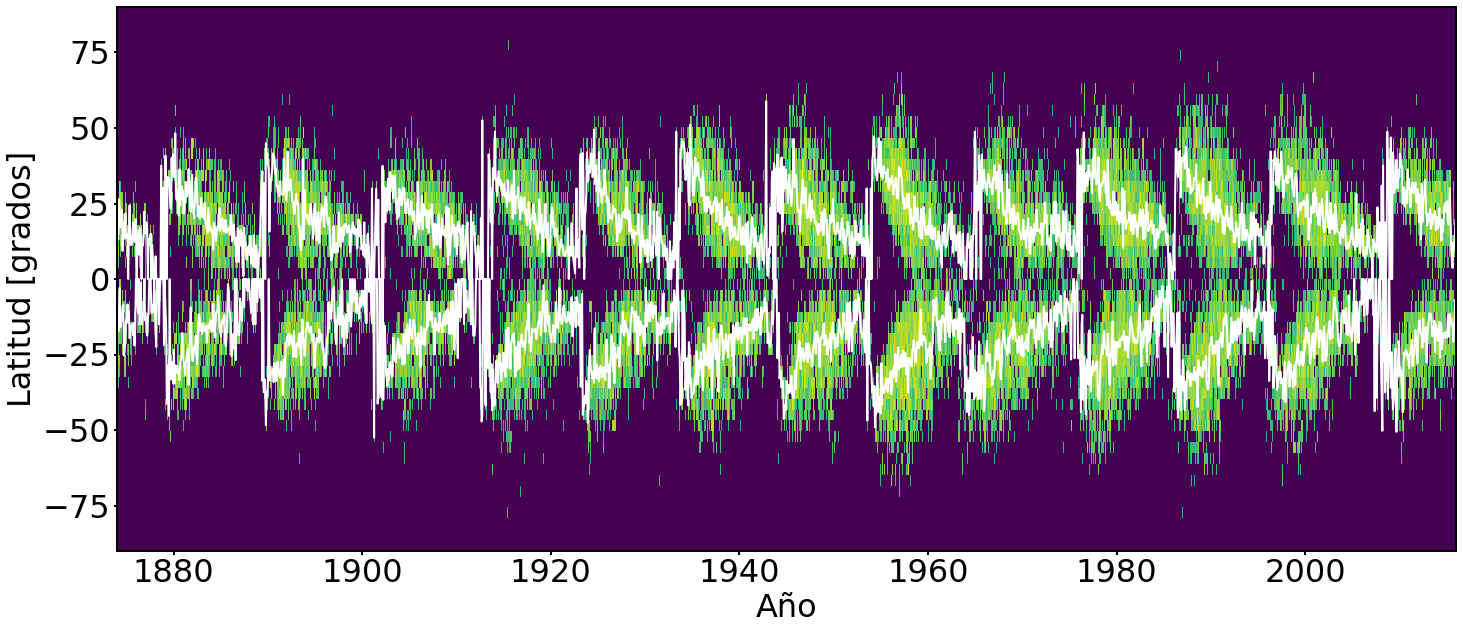

In [6]:
rcParams['font.size']=32
fig = plt.figure(figsize=(24,10))
ax  = fig.subplots()

# same imshow as the last created:
ax.imshow(suns_lat, aspect ='auto', norm=PowerNorm(gamma=0.05), cmap ='viridis', extent=[t0,tf,-90,90])

time_array = numpy.linspace(t0, tf, num=len(time))  # time [years] of our data, with len(mean_lat) bins

# add the mean we just calculated
for mean_lat in [mean_lat_up, mean_lat_low]:
    ax.plot(time_array, mean_lat, linewidth = 2,color = 'white')
    
ax.set_xlabel('Año')
ax.set_ylabel('Latitud [grados]')

fig.savefig(folder + '/plots/butterfly_sun_latitude_average.png', dpi=500, bbox_inches='tight')

plt.show()

In [7]:
# Standard procedure to sonify the mean latitude of sunspots as a function of time
for a,n in zip([mean_lat_up, mean_lat_low],['up','low']): # for each hemisphere
    data_table = Table({"time": time,"flux": a})
    data_soni = SoniSeries(data_table)
    data_soni.sonify()
    data_soni.write(folder + '/sonifications/sunspots_latitude_' + n + '_1.wav')

Pyo message: Offline Server rendering file /media/irene/6000-8897/AstroAccesible/sonifications/sunspots_latitude_up_1.wav dur=19.560000
Pyo message: Offline Server rendering finished.
Pyo message: Offline Server rendering file /media/irene/6000-8897/AstroAccesible/sonifications/sunspots_latitude_low_1.wav dur=19.560000
Pyo message: Offline Server rendering finished.
